# MNIST with CNNs
This notebook introduces convolutional neural networks, widely employed for computer vision, using Keras. Their performance is demonstrated on the MNIST handwritten digit data set.

In [9]:
%matplotlib inline
%matplotlib notebook
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input image dimensions

img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print( x_train.shape[0], 'train samples')
print( x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def get_splits(X, y, ratio=0.1, cat=False):
    """
    Finds a random split of size ratio*size(data).
    Returns the corresponding splits of X and y.
    """
    val_ids = np.random.choice(np.arange(X.shape[0]), int(X.shape[0]*ratio), replace=False)
    train_ids = np.delete(np.arange(X.shape[0]), val_ids)
    x_train = X[train_ids,:]
    x_val = X[val_ids,:]
    if cat:
        y_train = y[train_ids,:]
        y_val = y[val_ids,:]
    else:
        y_train = y[train_ids]
        y_val = y[val_ids]                
    return x_train, y_train, x_val, y_val

In [4]:
# Split apart validation set
x_train, y_train, x_val, y_val = get_splits(x_train, y_train, ratio=0.05, cat=False)
print( 'Train: {}. Validation: {}'.format(x_train.shape, x_val.shape))

Train: (57000, 28, 28, 1). Validation: (3000, 28, 28, 1)


In [5]:
# convert labels to one-hot form
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Build the CNN
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
train_loss = []
val_loss = []

Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 8s 137us/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.0288 - val_acc: 0.9913
Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 8s 137us/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0349 - val_acc: 0.9913
Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 8s 137us/step - loss: 0.0159 - acc: 0.9947 - val_loss: 0.0264 - val_acc: 0.9923
Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 8s 137us/step - loss: 0.0139 - acc: 0.9954 - val_loss: 0.0298 - val_acc: 0.9910
Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 8s 137us/step - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0252 - val_acc: 0.9927
Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000

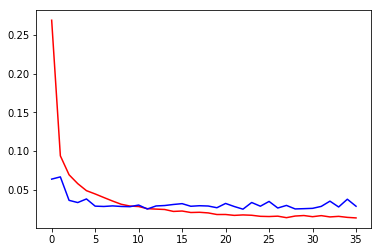

In [30]:
%matplotlib inline
# Train
fig = plt.figure()
ax = fig.gca()

batch_size = 128
epochs = 12

for i in range(epochs):
    history = model.fit(x_train, y_train, epochs=1, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))
    
    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    
    ax.clear()    
    ax.plot(train_loss, color='red', label='Train')
    ax.plot(val_loss, color='blue', label='Validation')

    fig.canvas.draw()        

Prediction: 7


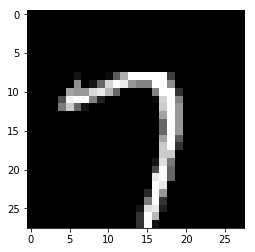

In [79]:
%matplotlib inline
# Predict random digits from the test set
import matplotlib.image as mpimg
i = np.random.choice(np.arange(x_test.shape[1]))
img_x = x_test[i].reshape([28,28])
x = np.array([x_test[i]])
print ('Prediction: {}'.format((np.argmax(model.predict(x)))))
plt.imshow(img_x,cmap='gray')

Prediction: 4


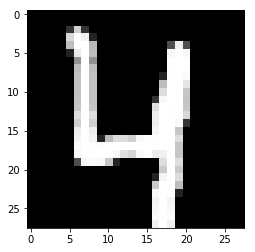

In [35]:
%matplotlib inline
# Predict our hand-written digits
# Try it at home: draw a number on a 28x28 black background, using any Paint-like app. See if the model can guess it
import matplotlib.image as mpimg
img=mpimg.imread('number.png')
x = np.array([img[:,:,[0]]])
print ('Prediction: {}'.format((np.argmax(model.predict(x)))))
plt.imshow(img,cmap='gray')